# <center>COVID-19 Rorschach test dataset</center>
   <center>Responses to the Rorschach test before and after COVID-19 </center>
   
   ![Rorschach](https://gitlab.com/SKJNR/covid-19-rorschach-test-dataset-analysis/-/raw/master/awe.png)
   
   
<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:Blue; border:0' role="tab" aria-controls="home"><center>Quick navigation</center></h3>

Submission details 
First Phase:
1. Preparing and presenting the split data samples to be used in the analysis.
2. Perform between-subject statistical analysis (covariance & clustering) of all the sample variables, to detect changes between pre and post pandemic responses to the Rorschach test.
3. Run cluster analysis on the significantly different variables.
4. Present an ML initial model for further exploratory analysis of the dataset.

* [1. Introduction](#1)
* [2. Data Reading and Analysis](#2)
* [3. Data Processing and Cleansing](#3) 
* [4. Model Training](#5) <br>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Introduction</center><a id=1></a></h3>
    
The Rorschach inkblot test, a commonly used psychological test, is often utilized to assess personality and emotional functioning. The Rorschach Assistant Program (RAP) is a free online application for the Rorschach testers’ community. The program has been used by professionals all over the world, for coding and analyzing the verbal responses to the ambiguous inkblots.
    
  

![](https://gitlab.com/SKJNR/covid-19-rorschach-test-dataset-analysis/-/raw/master/awe34.png)

The ‘COVID-19 Rorschach test dataset’ is a sample of protocols and responses, from 2017-01-01 to 2020-09-15. It includes some demographics related variables and the codes of the Comprehensive System (Exner, 2001). The dataset contains more than 500,000 coded responses to the test inkblots stimuli.


### Objectives

1. Preparing and presenting the split data samples to be used in the analysis.
2. Perform between-subject statistical analysis (covariance & clustering) of all the sample variables, to detect changes between pre and post pandemic responses to the Rorschach test.
3. Run cluster analysis on the significantly different variables.
4. Present an ML initial model for further exploratory analysis of the dataset.

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Data Reading and Analysis</center><a id=2></a></h3>

In [1]:
# importing all important libraries 

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [2]:
data=pd.read_csv('rap_dataset.tsv', sep='\t')
data.head()

User PQLevel  Client  Age Gender Country  Protocol        TestDate   R  \
0   136       C   31852   28   Male  Israel     32669  4/28/2017 1:06  22   
1   136       C   31852   28   Male  Israel     32669  4/28/2017 1:06  22   
2   136       C   31852   28   Male  Israel     32669  4/28/2017 1:06  22   
3   136       C   31852   28   Male  Israel     32669  4/28/2017 1:06  22   
4   136       C   31852   28   Male  Israel     32669  4/28/2017 1:06  22   

   ResponseOrder  ...  Determinants Pair  FormQuality FQText Contents  \
0              2  ...           FC'    0            o    NaN    Hd,Hx   
1              1  ...             F    1            -    NaN        A   
2              3  ...             F    1            -    NaN     Ad,A   
3              4  ...           C'F    0            -    NaN       Hd   
4              5  ...             F    1            o    NaN        A   

   Popular ZCode ZScore SpecialScores  Rejection  
0        0    ZS    3.5           PHR          0  
1        0   NaN    NaN           NaN          0  
2        0    ZA    3.0           FAB          0  
3        0    ZW    5.5           PHR          0  
4        0   NaN    NaN           NaN          0  

[5 rows x 24 columns]

### Data Description :

1. User                    : User Id number
2. PQlevel                 : Professional qualifications levels are based on the  
3. Clinet                  : Client Id number
4. Age                     : Client age in Years
5. Gender                  : Client Gender
6. Country                 : Client Country
7. Protocol                : Protocol Id Number
8. Test Date               : The Date the RAP3 protocol was created 
9. R                       : The total number of the responses associated with the protocol 
10. ResponseOrder          : The order of responses in the protocol
11. CardId                 : Rorschach cardnumber 1 to 10 
12. Location               : Indicated to which area of the blot the responses referred to 
13. LocationNumber         : The location Normative Number
14. Developmental Quality  : The quality of processing that has been involved in the formation of the responses
15. Determinants           : All the visual stimulli in the blot that shaped the reported objects in the response . 
16. Pair                   : Two identical objects are reported , based on the symmetry of the blot
17. Form Quality           : Indicates how good is the fitness between the area of blot being used and the form requirements of the object specified in the response 
18. FQtext                 : The form quality associated Normative Text 
19. Contents               : Content Coding is consisting of abbrevations for the category to which the responded object Belongs
20. Popular                : Responses that occur with a high frequency with a normative sample .
21. ZCode                  : ZCode is coded in responses that involve organizational activity of relationships between distinct blot areas .
22. ZScore                 : A Numerical value assigned to responses in which such Organizational activity occurs .
23. Special Scores         : Indicate the presence of special features in the response 
24. Rejection              : The number of card rejections in the Protocol .

In [3]:
data.isnull().sum()

User                         0
PQLevel                      0
Client                       0
Age                          0
Gender                       0
Country                      0
Protocol                     0
TestDate                     0
R                            0
ResponseOrder                0
cardID                       0
Location                     0
LocationNumber          119435
DevelopmentalQuality         0
Determinants                 0
Pair                         0
FormQuality                  0
FQText                  442103
Contents                     0
Popular                      0
ZCode                   238068
ZScore                  238069
SpecialScores           298146
Rejection                    0
dtype: int64

### Observations :
1. LocationNumber contains many missing or null values , we have to treat them 
2. FQText also contains Missing and Null values 
3. Zcode,Zscore and SpecialScores contains many null or missing values .
 > Overall compare to all other missing features FQtext contains many null or missing values .

In [4]:
data.shape

(506480, 24)


<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Data Processing and Cleansing</center><a id=3></a></h3>

### Data Preparation
* Protocol with less thatn 7 responses should be excluded from the analysis
* Exclude all 2019 protocol from Ukraine

In [5]:
data_prep = data.groupby('Protocol')['R'].count()
pd.DataFrame(data_prep)

R
Protocol    
29415     22
29417     24
29419     19
29420     14
29421     37
...       ..
59519     15
59520     22
59521     23
59522     28
59523     16

[24801 rows x 1 columns]

In [6]:
proc_less_than_7 = data[data['R'] < 7]['Protocol'].unique()
proc_less_than_7

array([57886, 46083, 46078, ..., 59293, 59480, 59511], dtype=int64)

In [7]:
# drop protocol with less than 7 responses

data_new = data[~data.Protocol.isin(proc_less_than_7)]
data_new

User PQLevel  Client  Age  Gender Country  Protocol         TestDate  \
0         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
1         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
2         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
3         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
4         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
...       ...     ...     ...  ...     ...     ...       ...              ...   
506475  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   
506476  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   
506477  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   
506478  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   
506479  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   

         R  ResponseOrder  ...  Determinants Pair  FormQuality FQText  \
0       22              2  ...           FC'    0            o    NaN   
1       22              1  ...             F    1            -    NaN   
2       22              3  ...             F    1            -    NaN   
3       22              4  ...           C'F    0            -    NaN   
4       22              5  ...             F    1            o    NaN   
...     ..            ...  ...           ...  ...          ...    ...   
506475   9              5  ...            Ma    1            o    NaN   
506476   9              6  ...             F    0            o    NaN   
506477   9              7  ...             F    0            u    NaN   
506478   9              8  ...             F    0            o    NaN   
506479   9              9  ...           FMa    0            o    NaN   

       Contents  Popular ZCode ZScore SpecialScores  Rejection  
0         Hd,Hx        0    ZS    3.5           PHR          0  
1             A        0   NaN    NaN           NaN          0  
2          Ad,A        0    ZA    3.0           FAB          0  
3            Hd        0    ZW    5.5           PHR          0  
4             A        0   NaN    NaN           NaN          0  
...         ...      ...   ...    ...           ...        ...  
506475  H,Cg,Id        1    ZA    3.0           GHR          0  
506476       Cg        0   NaN    NaN           NaN          0  
506477        A        0    ZW    2.0           NaN          0  
506478        A        1    ZW    1.0           NaN          0  
506479     A,Hd        0    ZA    2.5    MOR,AG,PHR          0  

[503475 rows x 24 columns]

In [8]:
#check
data_new[data_new['R'] < 7]

Empty DataFrame
Columns: [User, PQLevel, Client, Age, Gender, Country, Protocol, TestDate, R, ResponseOrder, cardID, Location, LocationNumber, DevelopmentalQuality, Determinants, Pair, FormQuality, FQText, Contents, Popular, ZCode, ZScore, SpecialScores, Rejection]
Index: []

[0 rows x 24 columns]

In [9]:
# Exclude 2019 protocols from Ukraine
data_new[['Country', 'TestDate']]
data_new[data_new['Country'] == 'Ukraine']

User PQLevel  Client  Age  Gender  Country  Protocol        TestDate  \
353       316       C   41740   17  Female  Ukraine     42730   7/3/2018 8:00   
354       316       C   41740   17  Female  Ukraine     42730   7/3/2018 8:00   
355       316       C   41740   17  Female  Ukraine     42730   7/3/2018 8:00   
356       316       C   41740   17  Female  Ukraine     42730   7/3/2018 8:00   
357       316       C   41740   17  Female  Ukraine     42730   7/3/2018 8:00   
...       ...     ...     ...  ...     ...      ...       ...             ...   
479406  27390       C   51580   20    Male  Ukraine     52677  9/23/2019 3:07   
479407  27390       C   51580   20    Male  Ukraine     52677  9/23/2019 3:07   
479408  27390       C   51580   20    Male  Ukraine     52677  9/23/2019 3:07   
479409  27390       C   51580   20    Male  Ukraine     52677  9/23/2019 3:07   
479410  27390       C   51580   20    Male  Ukraine     52677  9/23/2019 3:07   

         R  ResponseOrder  ...  Determinants Pair  FormQuality         FQText  \
353     17              1  ...             F    1            u            NaN   
354     17              2  ...            FY    0            o  Human (Whole)   
355     17              3  ...            Ma    1            o            NaN   
356     17              4  ...             F    0            -            NaN   
357     17              5  ...            Ma    1            o            NaN   
...     ..            ...  ...           ...  ...          ...            ...   
479406  17             13  ...            Mp    1            o            NaN   
479407  17             14  ...         FC,FV    1            u            NaN   
479408  17             15  ...             F    0            o            NaN   
479409  17             16  ...             F    1            o            NaN   
479410  17             17  ...            FC    1            u            NaN   

       Contents  Popular ZCode ZScore SpecialScores  Rejection  
353          Id        0    ZS    3.5           NaN          0  
354           H        0   NaN    NaN           GHR          0  
355     Na,Hh,A        1    ZA    3.0      FAB2,PHR          0  
356        A,Cg        0    ZD    4.0            DV          0  
357        H,Id        1    ZA    3.0        AG,GHR          0  
...         ...      ...   ...    ...           ...        ...  
479406        A        1    ZA    3.0  PHR,COP,FAB2          0  
479407     A,Bt        0    ZA    2.5           NaN          0  
479408       Id        0   NaN    NaN           NaN          0  
479409        A        1   NaN    NaN            DV          0  
479410        A        0   NaN    NaN           NaN          0  

[617 rows x 24 columns]

In [10]:
import datetime as dt
data_updt_excl = data_new.loc[~(data_new['Country'] == 'Ukraine') & ~(pd.to_datetime(data_new['TestDate']).dt.year == 2019)]

In [11]:
data_updt_excl

User PQLevel  Client  Age  Gender Country  Protocol         TestDate  \
0         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
1         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
2         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
3         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
4         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
...       ...     ...     ...  ...     ...     ...       ...              ...   
506475  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   
506476  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   
506477  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   
506478  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   
506479  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   

         R  ResponseOrder  ...  Determinants Pair  FormQuality FQText  \
0       22              2  ...           FC'    0            o    NaN   
1       22              1  ...             F    1            -    NaN   
2       22              3  ...             F    1            -    NaN   
3       22              4  ...           C'F    0            -    NaN   
4       22              5  ...             F    1            o    NaN   
...     ..            ...  ...           ...  ...          ...    ...   
506475   9              5  ...            Ma    1            o    NaN   
506476   9              6  ...             F    0            o    NaN   
506477   9              7  ...             F    0            u    NaN   
506478   9              8  ...             F    0            o    NaN   
506479   9              9  ...           FMa    0            o    NaN   

       Contents  Popular ZCode ZScore SpecialScores  Rejection  
0         Hd,Hx        0    ZS    3.5           PHR          0  
1             A        0   NaN    NaN           NaN          0  
2          Ad,A        0    ZA    3.0           FAB          0  
3            Hd        0    ZW    5.5           PHR          0  
4             A        0   NaN    NaN           NaN          0  
...         ...      ...   ...    ...           ...        ...  
506475  H,Cg,Id        1    ZA    3.0           GHR          0  
506476       Cg        0   NaN    NaN           NaN          0  
506477        A        0    ZW    2.0           NaN          0  
506478        A        1    ZW    1.0           NaN          0  
506479     A,Hd        0    ZA    2.5    MOR,AG,PHR          0  

[352242 rows x 24 columns]

In [12]:
data_updt_excl[pd.to_datetime(data_updt_excl['TestDate']).dt.year == 2019]

Empty DataFrame
Columns: [User, PQLevel, Client, Age, Gender, Country, Protocol, TestDate, R, ResponseOrder, cardID, Location, LocationNumber, DevelopmentalQuality, Determinants, Pair, FormQuality, FQText, Contents, Popular, ZCode, ZScore, SpecialScores, Rejection]
Index: []

[0 rows x 24 columns]

In [13]:
data_updt_excl[data_updt_excl['Country'] == 'Ukraine']

Empty DataFrame
Columns: [User, PQLevel, Client, Age, Gender, Country, Protocol, TestDate, R, ResponseOrder, cardID, Location, LocationNumber, DevelopmentalQuality, Determinants, Pair, FormQuality, FQText, Contents, Popular, ZCode, ZScore, SpecialScores, Rejection]
Index: []

[0 rows x 24 columns]

In [14]:
data_updt_excl

User PQLevel  Client  Age  Gender Country  Protocol         TestDate  \
0         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
1         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
2         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
3         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
4         136       C   31852   28    Male  Israel     32669   4/28/2017 1:06   
...       ...     ...     ...  ...     ...     ...       ...              ...   
506475  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   
506476  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   
506477  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   
506478  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   
506479  29958       C   58342   55  Female   Italy     59500  9/13/2020 10:05   

         R  ResponseOrder  ...  Determinants Pair  FormQuality FQText  \
0       22              2  ...           FC'    0            o    NaN   
1       22              1  ...             F    1            -    NaN   
2       22              3  ...             F    1            -    NaN   
3       22              4  ...           C'F    0            -    NaN   
4       22              5  ...             F    1            o    NaN   
...     ..            ...  ...           ...  ...          ...    ...   
506475   9              5  ...            Ma    1            o    NaN   
506476   9              6  ...             F    0            o    NaN   
506477   9              7  ...             F    0            u    NaN   
506478   9              8  ...             F    0            o    NaN   
506479   9              9  ...           FMa    0            o    NaN   

       Contents  Popular ZCode ZScore SpecialScores  Rejection  
0         Hd,Hx        0    ZS    3.5           PHR          0  
1             A        0   NaN    NaN           NaN          0  
2          Ad,A        0    ZA    3.0           FAB          0  
3            Hd        0    ZW    5.5           PHR          0  
4             A        0   NaN    NaN           NaN          0  
...         ...      ...   ...    ...           ...        ...  
506475  H,Cg,Id        1    ZA    3.0           GHR          0  
506476       Cg        0   NaN    NaN           NaN          0  
506477        A        0    ZW    2.0           NaN          0  
506478        A        1    ZW    1.0           NaN          0  
506479     A,Hd        0    ZA    2.5    MOR,AG,PHR          0  

[352242 rows x 24 columns]

In [15]:
pd.to_datetime(data_new['TestDate'])

0        2017-04-28 01:06:00
1        2017-04-28 01:06:00
2        2017-04-28 01:06:00
3        2017-04-28 01:06:00
4        2017-04-28 01:06:00
                 ...        
506475   2020-09-13 10:05:00
506476   2020-09-13 10:05:00
506477   2020-09-13 10:05:00
506478   2020-09-13 10:05:00
506479   2020-09-13 10:05:00
Name: TestDate, Length: 503475, dtype: datetime64[ns]

In [16]:
data_new.head()

User PQLevel  Client  Age Gender Country  Protocol        TestDate   R  \
0   136       C   31852   28   Male  Israel     32669  4/28/2017 1:06  22   
1   136       C   31852   28   Male  Israel     32669  4/28/2017 1:06  22   
2   136       C   31852   28   Male  Israel     32669  4/28/2017 1:06  22   
3   136       C   31852   28   Male  Israel     32669  4/28/2017 1:06  22   
4   136       C   31852   28   Male  Israel     32669  4/28/2017 1:06  22   

   ResponseOrder  ...  Determinants Pair  FormQuality FQText Contents  \
0              2  ...           FC'    0            o    NaN    Hd,Hx   
1              1  ...             F    1            -    NaN        A   
2              3  ...             F    1            -    NaN     Ad,A   
3              4  ...           C'F    0            -    NaN       Hd   
4              5  ...             F    1            o    NaN        A   

   Popular ZCode ZScore SpecialScores  Rejection  
0        0    ZS    3.5           PHR          0  
1        0   NaN    NaN           NaN          0  
2        0    ZA    3.0           FAB          0  
3        0    ZW    5.5           PHR          0  
4        0   NaN    NaN           NaN          0  

[5 rows x 24 columns]

In [17]:
# Handle missing values and drop values that cannot be scaled
data_new.isnull().sum()

User                         0
PQLevel                      0
Client                       0
Age                          0
Gender                       0
Country                      0
Protocol                     0
TestDate                     0
R                            0
ResponseOrder                0
cardID                       0
Location                     0
LocationNumber          118778
DevelopmentalQuality         0
Determinants                 0
Pair                         0
FormQuality                  0
FQText                  439477
Contents                     0
Popular                      0
ZCode                   237174
ZScore                  237175
SpecialScores           296556
Rejection                    0
dtype: int64

From here we can observe that LocationNumber , FQText .

It's better to drop those features , so first i am going to analyze data

In [18]:
## dropp unsignificant features & columns with alot missing data
data_new=data_new.drop(['FQText','LocationNumber','User',"Client","cardID"],axis=1)

In [19]:
data_new["Rejection"].unique()

array([0, 1, 2, 3, 5, 7, 4], dtype=int64)

In [20]:
cat_col = ['PQLevel', 'Gender', 'Country', 'Location', 'DevelopmentalQuality', 'FormQuality','Determinants','Contents', 'Popular',  'Zcode', 'SpecialScores']

In [21]:
for i in data_new.select_dtypes(include='object').columns:
    print(i,len(data_new[i].unique()))

PQLevel 3
Gender 3
Country 160
TestDate 23279
Location 6
DevelopmentalQuality 4
Determinants 6311
FormQuality 5
Contents 7288
ZCode 5
SpecialScores 3710


In [22]:
# need to split these values 
data_new.Contents

0           Hd,Hx
1               A
2            Ad,A
3              Hd
4               A
           ...   
506475    H,Cg,Id
506476         Cg
506477          A
506478          A
506479       A,Hd
Name: Contents, Length: 503475, dtype: object

In [23]:
dfcopy = data_new.copy()

In [24]:
# checking shape
dfcopy.shape

(503475, 19)

In [25]:
# Now i'm going to split data where coded variables contains more than one code in SpecialScores
dfcopy = dfcopy.drop('SpecialScores', axis=1).join(dfcopy['SpecialScores'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('SpecialScores'))
for i in dfcopy.select_dtypes(include='object').columns:
    print(i,len(dfcopy[i].unique()))

dfcopy.shape

PQLevel 3
Gender 3
Country 160
TestDate 23279
Location 6
DevelopmentalQuality 4
Determinants 6311
FormQuality 5
Contents 7288
ZCode 5
SpecialScores 20


(586817, 19)

In [26]:
# Now i'm going to split data where coded variables contains more than one code in Determinants

dfc =(dfcopy['Determinants'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Determinants'))
dfcopy = dfcopy.drop('Determinants', axis=1).join(dfc)

In [27]:
numdf = dfcopy.select_dtypes(include='number')
numdf.isnull().sum()

Age                   0
Protocol              0
R                     0
ResponseOrder         0
Pair                  0
Popular               0
ZScore           315837
Rejection             0
dtype: int64

In [28]:
# check shape before processing coded values and after coded values
print('shape of data before processing',dfcopy.shape)
print('shape of data after processing',data_new.shape)

shape of data before processing (1052584, 19)
shape of data after processing (503475, 19)


In [29]:
mask2 = (pd.to_datetime(dfcopy['TestDate']) > '2020-03-01') & (pd.to_datetime(dfcopy['TestDate']) <= '2020-09-15')

post_pandemic = dfcopy.loc[mask2]
post_pandemic

PQLevel  Age  Gender Country  Protocol         TestDate   R  \
221          C   16    Male  Israel     58315   6/29/2020 4:31  14   
222          C   16    Male  Israel     58315   6/29/2020 4:31  14   
223          C   16    Male  Israel     58315   6/29/2020 4:31  14   
224          C   16    Male  Israel     58315   6/29/2020 4:31  14   
225          C   16    Male  Israel     58315   6/29/2020 4:31  14   
...        ...  ...     ...     ...       ...              ...  ..   
506479       C   55  Female   Italy     59500  9/13/2020 10:05   9   
506479       C   55  Female   Italy     59500  9/13/2020 10:05   9   
506479       C   55  Female   Italy     59500  9/13/2020 10:05   9   
506479       C   55  Female   Italy     59500  9/13/2020 10:05   9   
506479       C   55  Female   Italy     59500  9/13/2020 10:05   9   

        ResponseOrder Location DevelopmentalQuality  Pair FormQuality  \
221                 1        W                    o     0           o   
222                 2        D                    o     0           u   
223                 3        D                    o     0           o   
224                 4        W                    o     0           o   
225                 5        W                    o     0           o   
...               ...      ...                  ...   ...         ...   
506479              9        W                    +     0           o   
506479              9        W                    +     0           o   
506479              9        W                    +     0           o   
506479              9        W                    +     0           o   
506479              9        W                    +     0           o   

       Contents  Popular ZCode  ZScore  Rejection SpecialScores Determinants  
221           A        1    ZW     1.0          0           NaN            F  
222           A        0   NaN     NaN          0           NaN           FC  
223          An        0   NaN     NaN          0           NaN            F  
224         (H)        1    ZW     2.0          0           GHR            F  
225           A        1    ZW     1.0          0           NaN            F  
...         ...      ...   ...     ...        ...           ...          ...  
506479     A,Hd        0    ZA     2.5          0            AG          FMa  
506479     A,Hd        0    ZA     2.5          0            AG          FMa  
506479     A,Hd        0    ZA     2.5          0           PHR          FMa  
506479     A,Hd        0    ZA     2.5          0           PHR          FMa  
506479     A,Hd        0    ZA     2.5          0           PHR          FMa  

[109351 rows x 19 columns]

In [30]:
# Spilt data into pre & post pandemic
# pre_pandemic = Jan 1, 2017 - Feb 29, 2020
# post_pandemic = Mar 1, 2020 - Sep 15, 2020

mask = (pd.to_datetime(dfcopy['TestDate']) > '2017-01-01') & (pd.to_datetime(dfcopy['TestDate']) <= '2020-02-29')

pre_pandemic = dfcopy.loc[mask]
pre_pandemic

PQLevel  Age Gender  Country  Protocol        TestDate   R  \
0            C   28   Male   Israel     32669  4/28/2017 1:06  22   
1            C   28   Male   Israel     32669  4/28/2017 1:06  22   
2            C   28   Male   Israel     32669  4/28/2017 1:06  22   
3            C   28   Male   Israel     32669  4/28/2017 1:06  22   
4            C   28   Male   Israel     32669  4/28/2017 1:06  22   
...        ...  ...    ...      ...       ...             ...  ..   
496334       C   23   Male  Finland     56360  2/27/2020 6:14  15   
496335       C   23   Male  Finland     56360  2/27/2020 6:14  15   
496336       C   23   Male  Finland     56360  2/27/2020 6:14  15   
496337       C   23   Male  Finland     56360  2/27/2020 6:14  15   
496338       C   23   Male  Finland     56360  2/27/2020 6:14  15   

        ResponseOrder Location DevelopmentalQuality  Pair FormQuality  \
0                   2       WS                    o     0           o   
1                   1        D                    o     1           -   
2                   3       Dd                    +     1           -   
3                   4       WS                    o     0           -   
4                   5       Dd                    o     1           o   
...               ...      ...                  ...   ...         ...   
496334             11        W                    o     0           -   
496335             12       Dd                    o     0           u   
496336             13        W                    v     0           u   
496337             14        W                    +     0           u   
496338             15        W                    +     1           o   

       Contents  Popular ZCode  ZScore  Rejection SpecialScores Determinants  
0         Hd,Hx        0    ZS     3.5          0           PHR          FC'  
1             A        0   NaN     NaN          0           NaN            F  
2          Ad,A        0    ZA     3.0          0           FAB            F  
3            Hd        0    ZW     5.5          0           PHR          C'F  
4             A        0   NaN     NaN          0           NaN            F  
...         ...      ...   ...     ...        ...           ...          ...  
496334       Fd        0    ZW     4.5          0          ALOG           CF  
496335      Art        0   NaN     NaN          0           NaN            F  
496336       Fd        0   NaN     NaN          0           MOR           CF  
496337    Sc,Id        0    ZW     5.5          0           MOR            F  
496338        A        1    ZW     5.5          0           NaN            F  

[942815 rows x 19 columns]

In [31]:
pre_pandemic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942815 entries, 0 to 496338
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   PQLevel               942815 non-null  object 
 1   Age                   942815 non-null  int64  
 2   Gender                942815 non-null  object 
 3   Country               942815 non-null  object 
 4   Protocol              942815 non-null  int64  
 5   TestDate              942815 non-null  object 
 6   R                     942815 non-null  int64  
 7   ResponseOrder         942815 non-null  int64  
 8   Location              942815 non-null  object 
 9   DevelopmentalQuality  942815 non-null  object 
 10  Pair                  942815 non-null  int64  
 11  FormQuality           942815 non-null  object 
 12  Contents              942815 non-null  object 
 13  Popular               942815 non-null  int64  
 14  ZCode                 660214 non-null  object 
 15  

In [32]:
# Now i'm going to split data where coded variables contains more than one code in Contents
pre_pandemic = pre_pandemic.drop('Contents', axis=1).join(pre_pandemic['Contents'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Contents'))
for i in pre_pandemic.select_dtypes(include='object').columns:
    print(i,len(pre_pandemic[i].unique()))

pre_pandemic.shape

PQLevel 3
Gender 3
Country 151
TestDate 20758
Location 6
DevelopmentalQuality 4
FormQuality 5
ZCode 5
SpecialScores 20
Determinants 29
Contents 27


(24589599, 19)

In [33]:
post_pandemic = post_pandemic.drop('Contents', axis=1).join(post_pandemic['Contents'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Contents'))
for i in post_pandemic.select_dtypes(include='object').columns:
    print(i,len(post_pandemic[i].unique()))

post_pandemic.shape

PQLevel 3
Gender 3
Country 76
TestDate 2509
Location 6
DevelopmentalQuality 4
FormQuality 5
ZCode 5
SpecialScores 20
Determinants 29
Contents 27


(2015414, 19)

In [34]:
# split features into Categorical and Numerical from entire dataset
catogrical = [x for x in dfcopy.columns if dfcopy[x].dtype == "object"]
numeric = [x for x in dfcopy.columns if dfcopy[x].dtype == "float64" or dfcopy[x].dtype == "int64"]

In [35]:
# let's move into deep dive
dfcopy[catogrical].describe()

PQLevel   Gender  Country        TestDate Location  \
count   1052584  1052584  1052584         1052584  1052584   
unique        3        3      160           23279        6   
top           C   Female    Italy  2/6/2020 13:07        W   
freq     991288   480618   228696            2305   419604   

       DevelopmentalQuality FormQuality Contents   ZCode SpecialScores  \
count               1052584     1052584  1052584  736748        719584   
unique                    4           5     7288       4            19   
top                       +           o        A      ZW           PHR   
freq                 505668      440274   217679  379097        160540   

       Determinants  
count       1052584  
unique           29  
top               F  
freq         282596

In [36]:
dfcopy[numeric].describe()

Age      Protocol             R  ResponseOrder          Pair  \
count  1.052584e+06  1.052584e+06  1.052584e+06   1.052584e+06  1.052584e+06   
mean   3.015717e+01  4.499610e+04  2.339776e+01   1.184791e+01  4.032077e-01   
std    1.678833e+01  8.440965e+03  9.030726e+00   8.654136e+00  4.905420e-01   
min   -1.000000e+00  2.941500e+04  7.000000e+00   1.000000e+00  0.000000e+00   
25%    1.700000e+01  3.774400e+04  1.700000e+01   5.000000e+00  0.000000e+00   
50%    2.600000e+01  4.512900e+04  2.100000e+01   1.000000e+01  0.000000e+00   
75%    4.000000e+01  5.224900e+04  2.700000e+01   1.600000e+01  1.000000e+00   
max    1.010000e+02  5.952300e+04  1.240000e+02   1.240000e+02  1.000000e+00   

            Popular         ZScore     Rejection  
count  1.052584e+06  736747.000000  1.052584e+06  
mean   2.345941e-01       3.470882  1.370152e-02  
std    4.237451e-01       1.406916  1.489490e-01  
min    0.000000e+00       1.000000  0.000000e+00  
25%    0.000000e+00       2.500000  0.000000e+00  
50%    0.000000e+00       3.500000  0.000000e+00  
75%    0.000000e+00       4.500000  0.000000e+00  
max    1.000000e+00       6.500000  7.000000e+00

In [37]:
pre_pandemic['Protocol'].nunique()

20993

In [38]:
post_pandemic['Protocol'].nunique()

2529

From above we can see summary for the entire categorical dataset.

In [39]:
# split features into Categorical and Numerical from pre_pandemic dataset
pre_catogrical = [x for x in pre_pandemic.columns if pre_pandemic[x].dtype == "object"]
pre_numeric = [x for x in pre_pandemic.columns if pre_pandemic[x].dtype == "float64"]

In [40]:
pre_pandemic[pre_catogrical].describe()

PQLevel    Gender   Country         TestDate  Location  \
count   24589599  24589599  24589599         24589599  24589599   
unique         3         3       151            20758         6   
top            C    Female    Israel  11/16/2017 3:31         W   
freq    22033005  12488077   6792832           594700  13610174   

       DevelopmentalQuality FormQuality     ZCode SpecialScores Determinants  \
count              24589599    24589599  23157175      24134783     24589599   
unique                    4           5         4            19           29   
top                       +           -        ZW           PHR           Ma   
freq               20055760     9154874  13139718       4689814      4549774   

        Contents  
count   24589599  
unique        27  
top            A  
freq     4158684

In [41]:
pre_pandemic[pre_numeric].describe()

ZScore
count  2.315718e+07
mean   4.175113e+00
std    1.269122e+00
min    1.000000e+00
25%    3.000000e+00
50%    4.500000e+00
75%    5.500000e+00
max    6.500000e+00

In [42]:
# split features into Categorical and Numerical from post_pandemic dataset
post_catogrical = [x for x in post_pandemic.columns if post_pandemic[x].dtype == "object"]
post_numeric = [x for x in post_pandemic.columns if post_pandemic[x].dtype == "float64"]

In [43]:
post_pandemic[post_catogrical].describe()

PQLevel   Gender              Country        TestDate Location  \
count   2015414  2015414              2015414         2015414  2015414   
unique        3        3                   76            2509        6   
top           C     Male  United States (USA)  9/13/2020 7:45        W   
freq    1883300   888223               410474           46339  1026407   

       DevelopmentalQuality FormQuality    ZCode SpecialScores Determinants  \
count               2015414     2015414  1880168       1958614      2015414   
unique                    4           5        4            19           29   
top                       +           o       ZW           PHR           Ma   
freq                1670745      683406   992721        406607       480207   

       Contents  
count   2015414  
unique       27  
top           A  
freq     363296

In [44]:
post_pandemic[post_numeric].describe()

ZScore
count  1.880167e+06
mean   4.043588e+00
std    1.199598e+00
min    1.000000e+00
25%    3.000000e+00
50%    4.500000e+00
75%    5.500000e+00
max    6.500000e+00

### ZCode in Pre_Pandemic vs Post_pandemic

In [45]:
print('ZCode in pre_pandemic')
print(pre_pandemic['ZCode'].value_counts())

ZCode in pre_pandemic
ZW    13139718
ZA     5704411
ZD     2578063
ZS     1734983
Name: ZCode, dtype: int64


From above we can observe that ZW and ZA was hap

In [46]:
print('ZCode in post_pandemic')
print(post_pandemic['ZCode'].value_counts())

ZCode in post_pandemic
ZW    992721
ZA    622176
ZD    192527
ZS     72744
Name: ZCode, dtype: int64


In [47]:
print('FormQuality in pre_pandemic')
print(pre_pandemic['FormQuality'].value_counts())

FormQuality in pre_pandemic
-       9154874
o       6706190
u       6171193
+       2304456
none     252886
Name: FormQuality, dtype: int64


In [48]:
print('FormQuality in post_pandemic')
print(post_pandemic['FormQuality'].value_counts())

FormQuality in post_pandemic
o       683406
-       659223
u       569183
+        84513
none     19089
Name: FormQuality, dtype: int64


Text(0.5, 1.0, 'Distribution of Gender  by FormQuality in Post_pandemic')

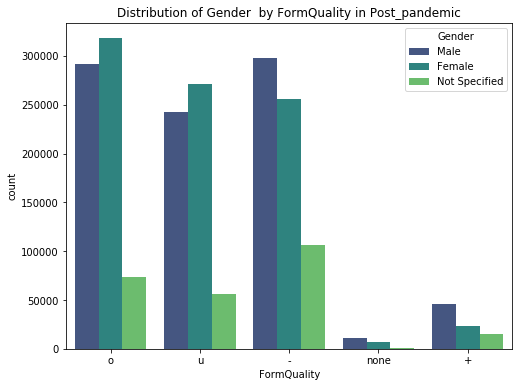

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(x='FormQuality',hue='Gender',data=post_pandemic,palette='viridis')
plt.title("Distribution of Gender  by FormQuality in Post_pandemic")

Text(0.5, 1.0, 'Distribution of Gender  by FormQuality in pre_pandemic')

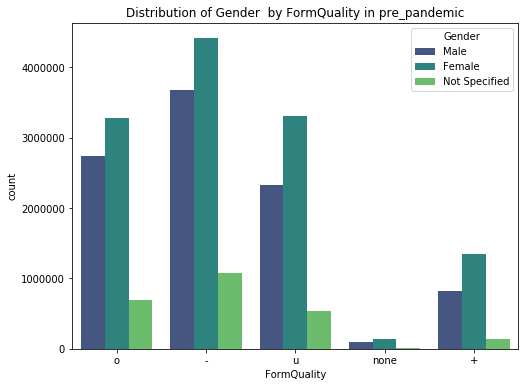

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(x='FormQuality',hue='Gender',data=pre_pandemic,palette='viridis')
plt.title("Distribution of Gender  by FormQuality in pre_pandemic")

In [51]:
print('Contents pre_pandemic')
print(pre_pandemic['Contents'].value_counts())

Contents pre_pandemic
A       4158684
H       3261232
Hx      2123571
Bl      1457274
(H)     1315072
Cg      1295989
Hd      1171163
An      1167922
Sc       986983
Ad       844738
Id       739304
Bt       735210
Na       726529
(A)      725835
Fi       516170
Art      497943
Hh       495207
Ls       423685
(Hd)     411047
Sx       362144
Ay       335124
Fd       249256
Cl       164890
(Ad)     162787
Ex       146739
Xy        75707
Ge        39394
Name: Contents, dtype: int64


In [52]:
print('Contents in post_pandemic')
print(post_pandemic['Contents'].value_counts())

Contents in post_pandemic
A       363296
H       271556
Hx      155749
An      126087
Bl      123310
(H)     116483
Cg      116369
Hd      106493
Sc       77271
Na       65973
Id       58671
Ad       55170
Hh       39881
Fi       38754
Art      38223
(Hd)     35400
Ls       33943
Bt       30696
(A)      30668
Ay       27713
Fd       26941
Sx       22064
Xy       14710
Cl       12671
Ex       12588
(Ad)      7911
Ge        6823
Name: Contents, dtype: int64


In [53]:
print('DevelopmentalQuality in pre_pandemic')
print(pre_pandemic['DevelopmentalQuality'].value_counts())

DevelopmentalQuality in pre_pandemic
+      20055760
o       2589885
v/+     1567023
v        376931
Name: DevelopmentalQuality, dtype: int64


In [54]:
print('DevelopmentalQuality in post_pandemic')
print(post_pandemic['DevelopmentalQuality'].value_counts())

DevelopmentalQuality in post_pandemic
+      1670745
o       219554
v/+      94615
v        30500
Name: DevelopmentalQuality, dtype: int64


Text(0.5, 1.0, 'Distribution of Gender  by DevelopmentalQuality')

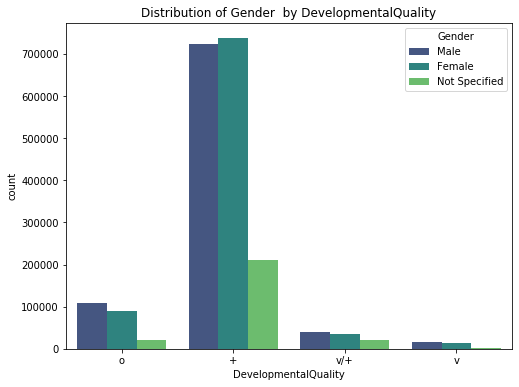

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(x='DevelopmentalQuality',hue='Gender',data=post_pandemic,palette='viridis')
plt.title("Distribution of Gender  by DevelopmentalQuality")

Text(0.5, 1.0, 'Distribution of Gender  by DevelopmentalQuality in pre_pandemic')

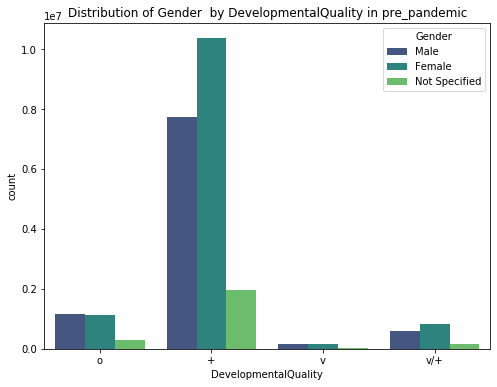

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(x='DevelopmentalQuality',hue='Gender',data=pre_pandemic,palette='viridis')
plt.title("Distribution of Gender  by DevelopmentalQuality in pre_pandemic")

In [57]:
print('Country in pre_pandemic')
print(pre_pandemic['Country'].value_counts())

Country in pre_pandemic
Israel                              6792832
United States (USA)                 5547894
Italy                               3603501
India                               1178835
Slovenia                            1178143
                                     ...   
Liberia                                  33
Kazakhstan                               31
Saint Helena                             22
Central African Republic                 19
Saint Vincent and the Grenadines         16
Name: Country, Length: 151, dtype: int64


In [58]:
print('Country in post_pandemic')
print(post_pandemic['Country'].value_counts())

Country in post_pandemic
United States (USA)    410474
Israel                 387738
Italy                  332294
Slovenia               253109
Argentina              101812
                        ...  
Costa Rica                 33
Solomon Islands            29
Andorra                    29
Ethiopia                   16
Nigeria                    15
Name: Country, Length: 76, dtype: int64


In [59]:
print('Gender in pre_pandemic')
print(pre_pandemic['Gender'].value_counts())

Gender in pre_pandemic
Female           12488077
Male              9640382
Not Specified     2461140
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Gender in Pre_pandemic')

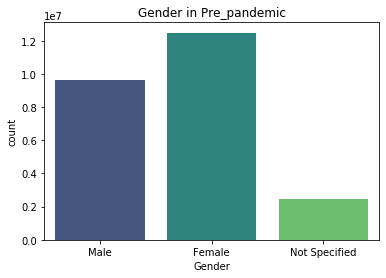

In [60]:
# let's check Gender pre pandemic and post pandemic

sns.countplot(pre_pandemic['Gender'],palette='viridis')
plt.title("Gender in Pre_pandemic")


Text(0.5, 1.0, 'Gender in Post_pandemic')

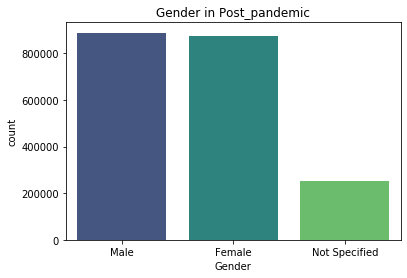

In [61]:
# let's check Gender pre pandemic and post pandemic

sns.countplot(post_pandemic['Gender'],palette='viridis')
plt.title("Gender in Post_pandemic")


In [62]:
print('Gender in post_pandemic')
print(post_pandemic['PQLevel'].value_counts())

Gender in post_pandemic
C    1883300
B     129290
A       2824
Name: PQLevel, dtype: int64


Text(0.5, 1.0, 'PQlevel in Pre_pandemic')

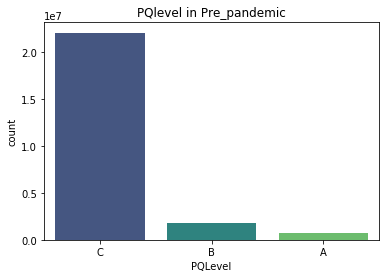

In [63]:
# let's check PQlevel pre pandemic and post pandemic

sns.countplot(pre_pandemic['PQLevel'],palette='viridis')
plt.title("PQlevel in Pre_pandemic")


In [64]:
print('PQLevel in pre_pandemic')
print(pre_pandemic['PQLevel'].value_counts())

PQLevel in pre_pandemic
C    22033005
B     1805830
A      750764
Name: PQLevel, dtype: int64


Text(0.5, 1.0, 'Distribution of Gender  by PQLevel')

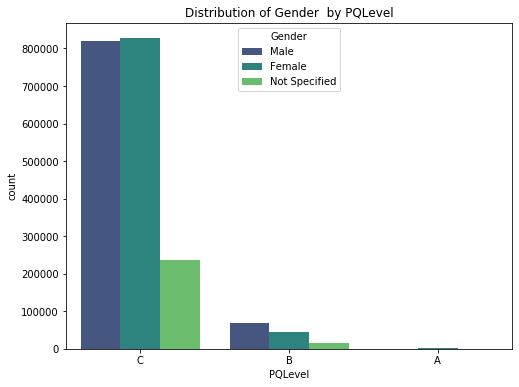

In [65]:
plt.figure(figsize=(8,6))
sns.countplot(x='PQLevel',hue='Gender',data=post_pandemic,palette='viridis')
plt.title("Distribution of Gender  by PQLevel")

In [66]:
#plt.figure(figsize=(8,6))
#sns.countplot(x='Contents',hue='Gender',data=post_pandemic,palette='viridis')
#plt.title("Distribution of Gender  by Contents in post_pandemic")

In [67]:
print('PQLevel in post_pandemic')
print(post_pandemic['PQLevel'].value_counts())

PQLevel in post_pandemic
C    1883300
B     129290
A       2824
Name: PQLevel, dtype: int64


Text(0.5, 1.0, 'Distribution of Gender  by PQLevel')

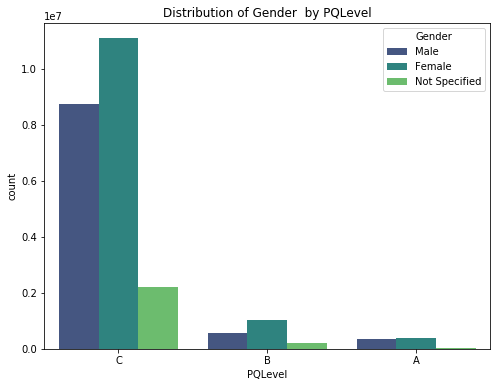

In [68]:

plt.figure(figsize=(8,6))
sns.countplot(x='PQLevel',hue='Gender',data=pre_pandemic,palette='viridis')
plt.title("Distribution of Gender  by PQLevel")

Text(0.5, 1.0, 'PQlevel in Post_pandemic')

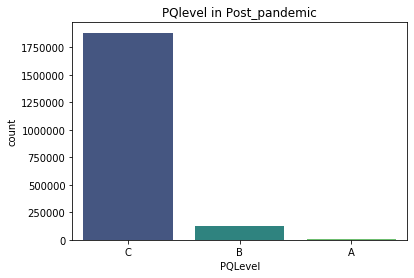

In [69]:
sns.countplot(post_pandemic['PQLevel'],palette='viridis')
plt.title("PQlevel in Post_pandemic")

>  as we can see post pandemic total male in PQLevel==c while less female in in PQLevel==c

In [ ]:
# prepare data
pre_Age=pre_pandemic.Age
post_Age=post_pandemic.Age

trace1 = go.Histogram(
    x=pre_Age,
    opacity=0.75,
    name = "Pre_Pandemic Age",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=post_Age,
    opacity=0.75,
    name ='Post_pandemic Age',
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(title=' Distribution of Age pre and post pandemic',
                   xaxis=dict(title='Age'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
ax=sns.kdeplot(post_pandemic["R"],label="Post_pandemic R")
sns.kdeplot(pre_pandemic["R"],label="Pore_pandemic.R")
plt.xlabel("R", fontsize=14)
plt.ylabel('count', fontsize=14)



> as we can sea identcal right squeed plot (pre&post) pandemic

In [ ]:
ax=sns.kdeplot(post_pandemic["Protocol"],label="Post_pandemic Protocol")
sns.kdeplot(pre_pandemic["Protocol"],label="Pore_pandemic Protocol")
plt.xlabel("Protocol", fontsize=14)
plt.ylabel('count', fontsize=14)

In [ ]:
ax=sns.kdeplot(post_pandemic["ResponseOrder"],label="ResponseOrder")
sns.kdeplot(pre_pandemic["ResponseOrder"],label="ResponseOrder")
plt.xlabel("ResponseOrder", fontsize=14)
plt.ylabel('count', fontsize=14)

In [ ]:
ax=sns.kdeplot(post_pandemic["Pair"],label="Pair")
sns.kdeplot(pre_pandemic["Pair"],label="Pair")
plt.xlabel("Pair", fontsize=14)
plt.ylabel('count', fontsize=14)

In [ ]:
ax=sns.distplot(post_pandemic["ZScore"],label="PopularPopular")
sns.distplot(pre_pandemic["ZScore"],label="Popular")
plt.xlabel("ZScore", fontsize=14)
plt.ylabel('count', fontsize=14)

In [ ]:
    # Now i'm going to split data where coded variables contains more than one code in SpecialScores
pre_pandemic= pre_pandemic.describe().drop('Contents', axis=1).join(pre_pandemic.describe()['Contents'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Contents'))
for i in pre_pandemic.describe().select_dtypes(include='object').columns:
    print(i,len(pre_pandemic[i].unique()))

pre_pandemic.shape 

In [ ]:
pre_pandemic.describe()

In [ ]:
post_pandemic.describe()

## Covariance Analysis

In [ ]:
#np.cov(X, Y)[0][1]
pre_pandemic.cov()

In [ ]:
post_pandemic.cov()

# ANOVA (ANalysis Of VAriance)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:

import researchpy as rp


## looping through diff vars.

### Location

In [ ]:
l=post_pandemic["Location"].unique()
for i in l:
    print(f"for post Location=={i}\n",rp.summary_cont(post_pandemic["Location"]==i),f"\n for pre Location=={i}\n",rp.summary_cont(pre_pandemic["Location"]==i))


### DevelopmentalQuality

In [ ]:
l=post_pandemic["DevelopmentalQuality"].unique()
for i in l:
    print(f"for post DevelopmentalQuality=={i}\n",rp.summary_cont(post_pandemic["DevelopmentalQuality"]==i),f"\n for pre DevelopmentalQuality=={i}\n",rp.summary_cont(pre_pandemic["DevelopmentalQuality"]==i))


### Determinants

In [ ]:
l=post_pandemic["Determinants"].unique()
for i in l:
    print(f"for postDeterminants=={i}\n",rp.summary_cont(post_pandemic["Determinants"]==i),f"\n for pre Determinants=={i}\n",rp.summary_cont(pre_pandemic["Determinants"]==i))


### FormQuality

In [ ]:
l=post_pandemic["FormQuality"].unique()
for i in l:
    print(f"for postFormQuality=={i}\n",rp.summary_cont(post_pandemic["FormQuality"]==i),f"\n for pre FormQuality=={i}\n",rp.summary_cont(pre_pandemic["FormQuality"]==i))


### SpecialScores

In [ ]:
l=post_pandemic["SpecialScores"].unique()
for i in l:
    print(f"for postSpecialScores=={i}\n",rp.summary_cont(post_pandemic["SpecialScores"]==i),f"\n for pre SpecialScores=={i}\n",rp.summary_cont(pre_pandemic["SpecialScores"]==i))


### ResponseOrder

In [ ]:
l=post_pandemic["ResponseOrder"].unique()
for i in l:
    print(f"for post ResponseOrder=={i}\n",rp.summary_cont(post_pandemic["ResponseOrder"]==i),f"\n for pre ResponseOrder=={i}\n",rp.summary_cont(pre_pandemic["ResponseOrder"]==i))


### PQLevel

In [ ]:

l=post_pandemic["PQLevel"].unique()
for i in l:
    print(f"for post PQLevel=={i}\n",rp.summary_cont(post_pandemic["PQLevel"]==i),f"\n for pre PQLevel=={i}\n",rp.summary_cont(pre_pandemic["PQLevel"]==i))


### ZScore

In [ ]:
l=post_pandemic["ZScore"].unique()
for i in l:
    print(f"for post ZScore=={i}\n",rp.summary_cont(post_pandemic["ZScore"]==i),f"\n for pre ZScore=={i}\n",rp.summary_cont(pre_pandemic["ZScore"]==i))


In [ ]:
location_f_post=post_pandemic.groupby(["Location","Protocol"]).size().reset_index(name="frequency")
location_f_post

In [ ]:
location_f_post=location_f_post.groupby(['Location']).frequency.mean().reset_index(name="Mean-Post-Sample-per-protocol")
location_f_post

In [ ]:
location_f_pre=pre_pandemic.groupby(["Location","Protocol"]).size().reset_index(name="frequency")
location_f_pre=location_f_pre.groupby(['Location']).frequency.mean().reset_index(name="Mean-Pre-Sample-per-protocol")
location_f_pre

In [ ]:
location_f_pre["Mean-Post-Sample-per-protocol"]=location_f_post["Mean-Post-Sample-per-protocol"]
location=location_f_pre 
location

In [ ]:
sns.catplot(x="Location", y="Mean-Pre-Sample-per-protocol",
            kind="point", data=location)
sns.catplot(x="Location", y="Mean-Post-Sample-per-protocol",
            kind="point", data=location)

In [ ]:
R_f_post=post_pandemic.groupby(["R","Protocol"]).size().reset_index(name="frequency")
R_f_post=R_f_post.groupby(['R']).frequency.mean().reset_index(name="Mean-Post-Sample-per-protocol")

R_f_pre=pre_pandemic.groupby(["R","Protocol"]).size().reset_index(name="frequency")
R_f_pre=R_f_pre.groupby(['R']).frequency.mean().reset_index(name="Mean-Pre-Sample-per-protocol")


In [ ]:
sns.kdeplot(R_f_pre["Mean-Pre-Sample-per-protocol"],label="R_pre_pandemic")
sns.kdeplot(R_f_post["Mean-Post-Sample-per-protocol"],label="R_post_pandemic")
plt.xlabel("r", fontsize=14)
plt.ylabel('average', fontsize=14)

In [ ]:
sns.scatterplot(x="R", y="Mean-Pre-Sample-per-protocol", data=R_f_pre,label="R_pre_pandemic")
ax=sns.scatterplot(x="R", y="Mean-Post-Sample-per-protocol", data=R_f_post,label="R_post_pandemic")


In [ ]:
R_f_pre["Mean-Post-Sample-per-protocol"]=R_f_post["Mean-Post-Sample-per-protocol"]
R=R_f_pre 
R

we can see significant change between The mean of R in pre_pandemic vs R in post_pandemic .

In [ ]:
DQ_f_post=post_pandemic.groupby(["DevelopmentalQuality","Protocol"]).size().reset_index(name="frequency")
DQ_f_post=DQ_f_post.groupby(['DevelopmentalQuality']).frequency.mean().reset_index(name="Mean-Post-Sample-per-protocol")

DQ_f_pre=pre_pandemic.groupby(["DevelopmentalQuality","Protocol"]).size().reset_index(name="frequency")
DQ_f_pre=DQ_f_pre.groupby(['DevelopmentalQuality']).frequency.mean().reset_index(name="Mean-Pre-Sample-per-protocol")


In [ ]:
sns.scatterplot(x="DevelopmentalQuality", y="Mean-Pre-Sample-per-protocol", data=DQ_f_pre,label="DQ_pre_pandemic")
sns.scatterplot(x="DevelopmentalQuality", y="Mean-Post-Sample-per-protocol", data=DQ_f_post,label="DQ_post_pandemic")


In [ ]:
DQ_f_pre["Mean-Post-Sample-per-protocol"]=DQ_f_post["Mean-Post-Sample-per-protocol"]
DQ=DQ_f_pre 
DQ

In [ ]:
Determinants_f_post=post_pandemic.groupby(["Determinants","Protocol"]).size().reset_index(name="frequency")
Determinants_f_post=Determinants_f_post.groupby(['Determinants']).frequency.mean().reset_index(name="Mean-Post-Sample-per-protocol")

Determinants_f_pre=pre_pandemic.groupby(["Determinants","Protocol"]).size().reset_index(name="frequency")
Determinants_f_pre=Determinants_f_pre.groupby(['Determinants']).frequency.mean().reset_index(name="Mean-Pre-Sample-per-protocol")


In [ ]:
plt.xticks(rotation=90)

sns.scatterplot(x="Determinants", y="Mean-Pre-Sample-per-protocol", data=Determinants_f_pre,label="Determinants_pre_pandemic")
sns.scatterplot(x="Determinants", y="Mean-Post-Sample-per-protocol", data=Determinants_f_post,label="Determinants_post_pandemic")




In [ ]:
sns.kdeplot(Determinants_f_pre["Mean-Pre-Sample-per-protocol"],label="Determinants_pre_pandemic")
ax=sns.kdeplot(Determinants_f_post["Mean-Post-Sample-per-protocol"],label="Determinants_post_pandemic")

plt.xlabel("r", fontsize=14)
plt.ylabel('average', fontsize=14)

In [ ]:
Determinants_f_pre["Mean-Post-Sample-per-protocol"]=Determinants_f_post["Mean-Post-Sample-per-protocol"]
Determinants=Determinants_f_pre 
Determinants

In [ ]:
ZScore_f_post=post_pandemic.groupby(["ZScore","Protocol"]).size().reset_index(name="frequency")
ZScore_f_post=ZScore_f_post.groupby(['ZScore']).frequency.mean().reset_index(name="Mean-Post-Sample-per-protocol")

ZScore_f_pre=pre_pandemic.groupby(["ZScore","Protocol"]).size().reset_index(name="frequency")
ZScore_f_pre=ZScore_f_pre.groupby(['ZScore']).frequency.mean().reset_index(name="Mean-Pre-Sample-per-protocol")


In [ ]:
sns.scatterplot(x="ZScore", y="Mean-Pre-Sample-per-protocol", data=ZScore_f_pre,label="ZScore")
sns.scatterplot(x="ZScore", y="Mean-Post-Sample-per-protocol", data=ZScore_f_post,label="ZScore")


In [ ]:
sns.kdeplot(ZScore_f_pre["Mean-Pre-Sample-per-protocol"],label="ZScore_pre_pandemic")
sns.kdeplot(ZScore_f_post["Mean-Post-Sample-per-protocol"],label="ZScore_post_pandemic")

plt.xlabel("ZScore", fontsize=14)
plt.ylabel('average', fontsize=14)

In [ ]:
ZScore_f_pre["Mean-Post-Sample-per-protocol"]=ZScore_f_post["Mean-Post-Sample-per-protocol"]
ZScore=ZScore_f_pre
ZScore

In [ ]:
SpecialScores

In [ ]:
SpecialScores_f_post=post_pandemic.groupby(["SpecialScores","Protocol"]).size().reset_index(name="frequency")
SpecialScores_f_post=SpecialScores_f_post.groupby(['SpecialScores']).frequency.mean().reset_index(name="Mean-Post-Sample-per-protocol")

SpecialScores_f_pre=pre_pandemic.groupby(["SpecialScores","Protocol"]).size().reset_index(name="frequency")
SpecialScores_f_pre=SpecialScores_f_pre.groupby(['SpecialScores']).frequency.mean().reset_index(name="Mean-Pre-Sample-per-protocol")


In [ ]:
sns.scatterplot(x="SpecialScores", y="Mean-Pre-Sample-per-protocol", data=SpecialScores_f_pre,label="SpecialScores")
sns.scatterplot(x="SpecialScores", y="Mean-Post-Sample-per-protocol", data=SpecialScores_f_post,label="SpecialScores")

plt.xticks(rotation=90)

In [ ]:
sns.kdeplot(SpecialScores_f_pre["Mean-Pre-Sample-per-protocol"],label="SpecialScores_post_pandemic")
sns.kdeplot(SpecialScores_f_post["Mean-Post-Sample-per-protocol"],label="SpecialScores_post_pandemic")

plt.xlabel("SpecialScores", fontsize=14)
plt.ylabel('average', fontsize=14)

In [ ]:
SpecialScores_f_pre["Mean-Post-Sample-per-protocol"]=SpecialScores_f_post["Mean-Post-Sample-per-protocol"]
SpecialScores=SpecialScores_f_pre 
SpecialScores

In [ ]:
FormQuality 

In [ ]:
FormQuality_f_post=post_pandemic.groupby(["FormQuality","Protocol"]).size().reset_index(name="frequency")
FormQuality_f_post=FormQuality_f_post.groupby(['FormQuality']).frequency.mean().reset_index(name="Mean-Post-Sample-per-protocol")

FormQuality_f_pre=pre_pandemic.groupby(["FormQuality","Protocol"]).size().reset_index(name="frequency")
FormQuality_f_pre=FormQuality_f_pre.groupby(['FormQuality']).frequency.mean().reset_index(name="Mean-Pre-Sample-per-protocol")


In [ ]:
sns.scatterplot(x="FormQuality", y="Mean-Pre-Sample-per-protocol", data=FormQuality_f_pre,label="FormQuality")
sns.scatterplot(x="FormQuality", y="Mean-Post-Sample-per-protocol", data=FormQuality_f_post,label="FormQuality")

plt.xticks(rotation=90)

In [ ]:
sns.kdeplot(FormQuality_f_pre["Mean-Pre-Sample-per-protocol"],label="FormQuality_post_pandemic")
ax=sns.kdeplot(FormQuality_f_post["Mean-Post-Sample-per-protocol"],label="FormQuality_post_pandemic")

plt.xlabel("FormQuality", fontsize=14)
plt.ylabel('Frequency', fontsize=14)

In [ ]:
FormQuality_f_pre["Mean-Post-Sample-per-protocol"]=FormQuality_f_post["Mean-Post-Sample-per-protocol"]
FormQuality=FormQuality_f_pre 
FormQuality